## Seaborn: facet ##

In seaborn i facet sono gestiti in modo diverso che da ggplot dove, come al solito, si procede per livelli successivi che aggiungono oggetti grafici, quindi anche i facet, in ggplot, sono un nuovo livello che si aggiunge alla definizione del grafico.<br>
Seaborn non ha questa impostazione ma usa sempliceemnte funzioni specifiche per ogni tipologia di grafico, e una visualizzazione a facet è considerata tale.

Per questa ragione esistono le funzioni `sns.relplot()`, `sns.catplot()` e `sns.displot()` dove:
- `relplot()` produce i facet con `scatterplot()` e `lineplot()`
- `catplot()` produce i facet per le molte tipologie di grafici con variabili categoriche
- `displot()` produce i facet per dati con distribuzione univariata e bivariata 

Per le tre funzioni, `relplot()`, `catplot()` e `displot()`, la definizione del tipo di grafico avviene con il parametro `kind=`<br>
Vediamo un primo esempio. 

**NOTA BENE:** Queste funzioni possono produrre grafici anche senza la visualizzazione per facet, per questo è sufficiente <ins>non specificare</ins> il parametro `col=` con la variabile da usare per creare i facet.

Questo può indurre a usarle genericamente al posto delle originali (es. `scatterplot()`, `barplot()`, `boxplot()`, etc.), come (purtroppo) si trova suggerito in molti esempi online.

**È una pessima pratica e una cattiva scelta.** 
Queste funzioni hanno dei limiti rispetto alle originali non predisposte per i facet e sono meno customizzabili (già seaborn non lo è particolarmente, nella sua versione originale almeno), quindi facilmente la qualità del risultato è peggiore.

## Relazioni tra variabili continue e facet: `relplot()`

Con la funzione `relplot()` si possono produrre:

- **scatterplot** con `kind="scatter"` (default)

- **lineplot** con `kind="line"`

Chiarito questo, il funzionamento è molto semplice. Rifacciamo l'esempio visto per R.

In [2]:
# librerie
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
#lettura del dataset
df_py=pd.read_csv("datasets/comune_milano/temperature2018.csv", 
    sep=",")
df_py

,Zone,Id Sensore,DataOra,Media
0,Lambrate,2001,2018-01-01T00:00:00Z,3.5
1,Zavattari,5920,2018-01-01T00:00:00Z,3.2
2,Juvara,5909,2018-01-01T00:00:00Z,4.0
3,Feltre,8162,2018-01-01T00:00:00Z,3.2
4,Brera,5897,2018-01-01T00:00:00Z,3.6
...,...,...,...,...
52417,Zavattari,5920,2018-12-31T00:00:00Z,6.1
52418,Juvara,5909,2018-12-31T00:00:00Z,5.8
52419,Feltre,8162,2018-12-31T00:00:00Z,1.6
52420,Brera,5897,2018-12-31T00:00:00Z,6.4


In [97]:
#conversione di tipo
df_py["DataOra"] = pd.to_datetime(df_py["DataOra"], 
    format='%Y-%m-%dT%H:%M:%SZ')

In [98]:
df_py.dtypes

Zone                  object
Id Sensore             int64
DataOra       datetime64[ns]
Media                float64
dtype: object

### Scatterplot e facet

Una differenza dell'uso di `relplot()` è che il risultato non è ridimensionabile con `plt.figure(figsize = ())`, anche per ruotare le diciture dell'asse x occorre usare una forma diversa.

Nella funzione notare i parametri: 
- `kind=`: `scatter` o `line`) 
- `col=`: la variabile da usare per creare i facet)
- `col_wrap=`: su quante colonne visualizzare i facet
- `height=`: l'altezza (in pollici) dei singoli facet

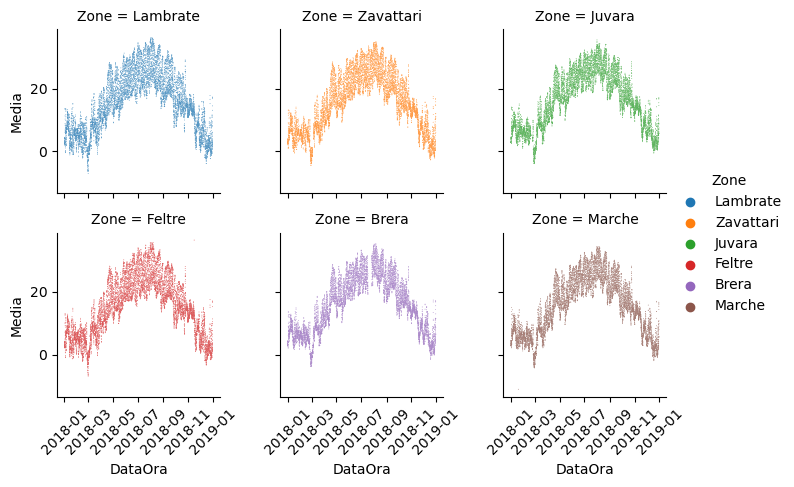

In [99]:
# scatterplot facets 
g=sns.relplot(data=df_py, x="DataOra", y="Media", hue="Zone", 
            s=0.3, kind="scatter", col="Zone", col_wrap=3, height=2.3)
g.set_xticklabels(rotation=45)

Per una panoramica delle varie opzioni grafiche (es. formato dei marker, palette di colori personalizzate, dimensione proporzionale rispetto ai valori di una variabile) si rimanda alle pagine del tutorial di seaborn per le funzioni [`seaborn.scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) e [`seaborn.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) (quest'ultima è la funzione che aggiunge allo scatterplot la o le linee di regressione lineare).

### Lineplot e facet

Per i lineplot cambia solo `kind="line"` e `linewidth=` al posto di `s=` per modificare lo spessore della linea, rispetto al caso precedente. 

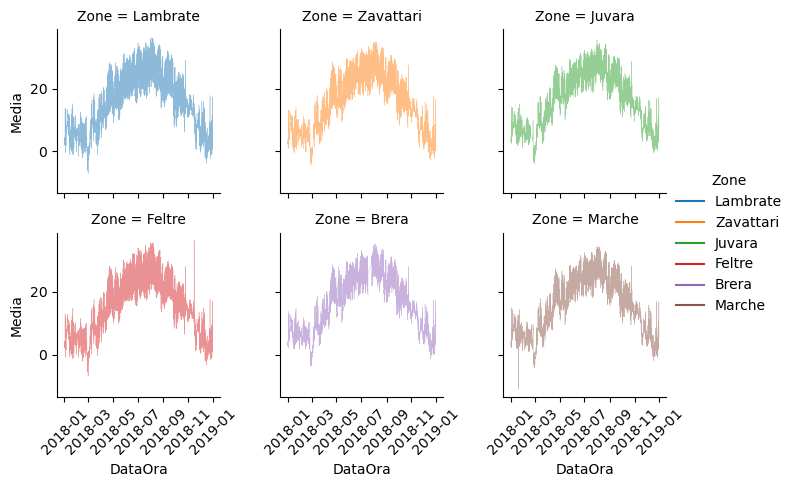

In [100]:
# lineplot facets 
g=sns.relplot(data=df_py, x="DataOra", y="Media", hue="Zone", 
            linewidth=0.3, alpha=0.5, kind="line", col="Zone", col_wrap=3, height=2.3)
g.set_xticklabels(rotation=45)

## Relazioni tra variabili categoriche e facet: `catplot()`

Con la funzione `catplot()` si possono produrre facet per:

- **stripplot** con `kind="strip"` (default)

- **swarmplot** con `kind="swarm"`

- **boxplot** con `kind="box"`

- **violinplot** con `kind="violin"`

- **boxenplot** con `kind="boxen"`

- **pointplot** con `kind="point"`

- **barplot** con `kind="bar"`

- **countplot** con `kind="count"`

Replichiamo gli esempi visti per R.

In [101]:
#lettura del dataset
df_py=pd.read_csv("datasets/comune_milano/qaria_datoariagiornostazione_2022-10-01.csv", 
    sep=";")
df_py

,stazione_id,data,inquinante,valore
0,1,2022-09-30,NO2,NaN
1,2,2022-09-30,C6H6,1.8
2,2,2022-09-30,NO2,47.0
3,2,2022-09-30,O3,63.0
4,2,2022-09-30,PM10,21.0
...,...,...,...,...
4859,7,2022-01-03,O3,11.0
4860,7,2022-01-03,PM10,57.0
4861,8,2022-01-03,C6H6,NaN
4862,8,2022-01-03,CO_8h,NaN


In [102]:
df_py["data"]=pd.to_datetime(df_py["data"], format="%Y-%m-%d")
df_py=df_py[~df_py.isna().any(axis=1)]

In [103]:
df_py.dtypes

stazione_id             int64
data           datetime64[ns]
inquinante             object
valore                float64
dtype: object

In [104]:
df_grp1=df_py.groupby([df_py['data'].dt.month_name(), "inquinante"])[["valore"]].sum()
df_grp1

valore
data      inquinante        
April     C6H6          49.1
          CO_8h         32.6
          NO2         5747.0
          O3          3762.0
          PM10        1793.0
...                      ...
September NO2         5926.0
          O3          4337.0
          PM10        1773.0
          PM25         699.0
          SO2           83.0

[63 rows x 1 columns]

In [105]:
df_grp1.reset_index(inplace=True)
df_grp1=df_grp1.rename(columns={"data":"mese"})
df_grp1

,mese,inquinante,valore
0,April,C6H6,49.1
1,April,CO_8h,32.6
2,April,NO2,5747.0
3,April,O3,3762.0
4,April,PM10,1793.0
...,...,...,...
58,September,NO2,5926.0
59,September,O3,4337.0
60,September,PM10,1773.0
61,September,PM25,699.0


In [108]:
df_grp1.dtypes

mese           object
inquinante     object
valore        float64
dtype: object

### Barplot e facet

Usiamo `kind=bar` per avere dei barplot nei facet.
Il risultato si ottiene facilmente ma non è altrettanto facilmente migliorabile o personalizzabile dell'analogo grafico prodotto con ggplot2.

Vediamo un primo esempio con i mesi come variabile per i facet.

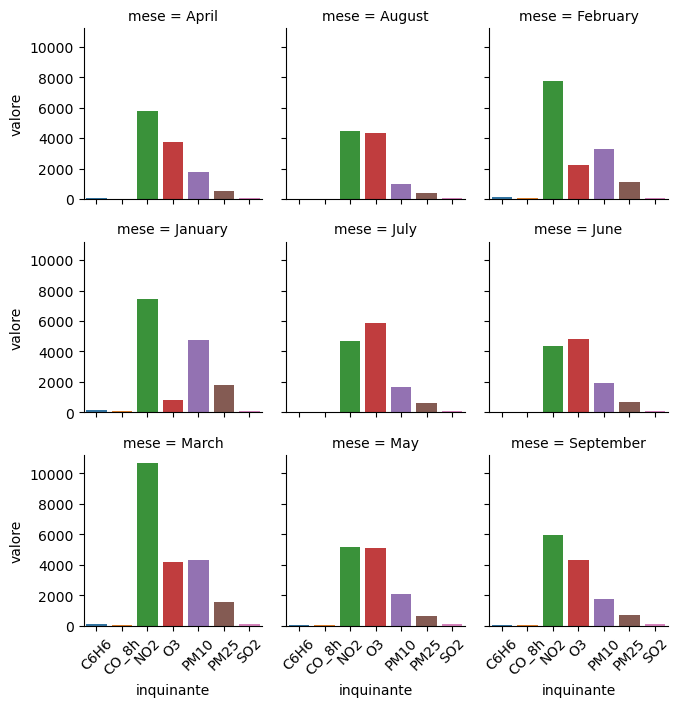

In [109]:
g=sns.catplot(data=df_grp1, x="inquinante", y="valore", 
              kind="bar",height=2.3, col="mese", col_wrap=3)
g.set_xticklabels(rotation=45)

### Caso di visualizzazione sbagliata

Vediamo un secondo esempio procedendo analogamente al corrispondente visto con ggplot.
L'uso di `hue="_variabile_"` produce però un risultato diverso, <ins>sbagliato graficamente</ins>, rispetto ad `aes(fill=inquinante)` di ggplot, perché le barre disegnate da seaborn sono dimensionate come se fossero affiancate alle altre corrispondenti ai valori della variabile; per questo sono così sottili e, appunto, graficamente sbagliate. Anche l'ordine dei mesi, quando espressi con nomi, è logicamente sbagliato.

**NOTA BENE:** Questa visualizzazione è sbagliata da un punto di vista pratico ma anche concettuale, non è semplicemente "migliorabile". **FunDV** chiarisce bene gli eventuali dubbi a riguardo. 

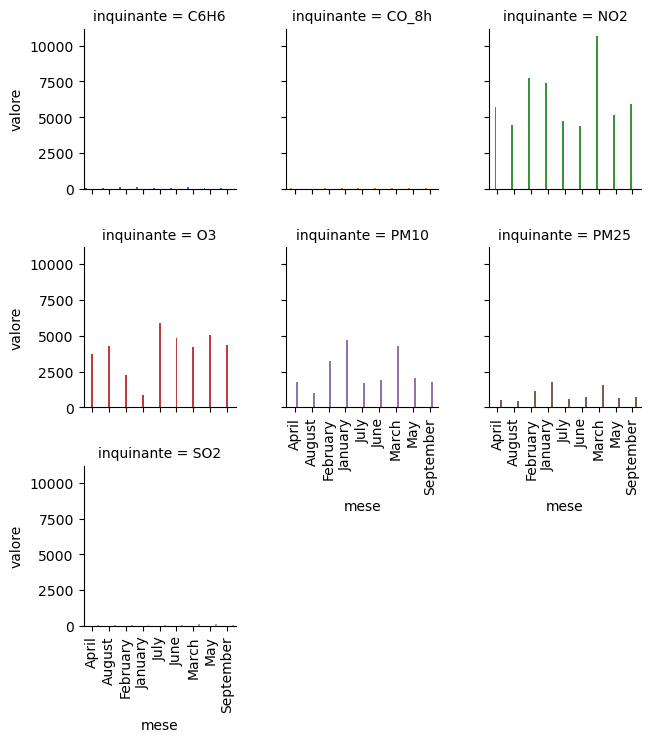

In [127]:
g=sns.catplot(data=df_grp1, x="mese", y="valore", hue="inquinante",
              kind="bar",height=2.3, col="inquinante", col_wrap=3)
g.set_xticklabels(rotation=90)

Il problema ha a che fare con i limiti di quelle funzioni - `relplot()`, `catplot()`, `displot()`- predefinite per produrre una visualizzazione a facet in maniera molto semplice, sostanzialmente usando la stessa forma della funzione originale (es. scatterplot(), barplot(), etc.) con solo alcuni semplici parametri aggiuntivi da specificare (`kind=`, `col=`). 
<br>
Da un lato questo semplifica, dall'altro rende le funzioni adatte solo a casi molto semplici e schematici con pochissime personalizzazioni.

Occorre considerare una modalità più generale e meno semplice di produrre i facet.

### Facet: modalità generale

Con la modalità generale non si utilizzano più le funzioni semplificate e già predisposte per la visualizzazione a facet - `relplot()`, `catplot()`, `displot()`- ma si costruisce con un meccanismo meno intuitivo ma più flessibile che usa le funzioni originali per produrre i diversi grafici.
<br>
Vediamo la logica poi l'esempio.

La logica prevede due passi distinti:
1. si crea la griglia di facet con gli elementi grafici generali
2. si definisce il tipo di grafico, con gli elementi specifici, da inserire nei facet

Le funzioni corrispondenti ai due passi sono:
1. sns.FacetGrid() 
2. map()

Le due saranno collegate da una stessa variabile/oggetto (usiamo `g` come nome della variabile):
        
        g=sns.FacetGrid(_elementi grafici generali_) 
        g.map(_funzione grafica ed elementi specifici_)
        
Questi i passi logici e lo schema per l'uso dei facet con seaborn nella modalità generale.

Ora possiamo riprodurre l'esempio precedente con la modalità generale e correggendo manualmente l'ordine dei nomi dei mesi (perché sono in formato alfanumerico, non datetime). Il questo modo il risultato è corretto.

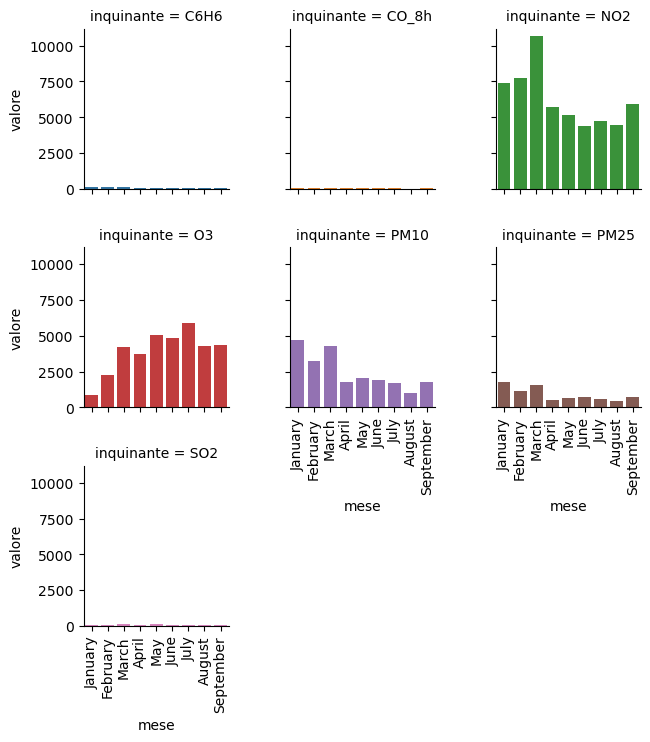

In [152]:
Ordine=["January", "February", "March", "April", "May", "June", "July", "August", "September"]

g = sns.FacetGrid(df_grp1, col='inquinante', hue='inquinante', col_wrap=3, height=2.3)
g.map(sns.barplot, 'mese', 'valore', order=Ordine)
g.set_xticklabels(rotation=90)

Ora vediamo anche l'ultimo esempio mostrato per ggplot con quattro variabili.
Dobbiamo modificare la precedente `groupby()` per avere i dati necessari.

In [134]:
df_grp2=df_py.groupby(["stazione_id", df_py['data'].dt.month_name(), "inquinante"])[["valore"]].sum()
df_grp2

valore
stazione_id data      inquinante        
2           April     C6H6          13.6
                      NO2          992.0
                      O3          1766.0
                      PM10         350.0
                      PM25         199.0
...                                  ...
7           May       O3          2690.0
                      PM10         522.0
            September NO2         1052.0
                      O3          2193.0
                      PM10         386.0

[185 rows x 1 columns]

In [136]:
df_grp2.reset_index(inplace=True)
df_grp2=df_grp2.rename(columns={"data":"mese", "valore":"totali"})
df_grp2

,stazione_id,mese,inquinante,totali
0,2,April,C6H6,13.6
1,2,April,NO2,992.0
2,2,April,O3,1766.0
3,2,April,PM10,350.0
4,2,April,PM25,199.0
...,...,...,...,...
180,7,May,O3,2690.0
181,7,May,PM10,522.0
182,7,September,NO2,1052.0
183,7,September,O3,2193.0


Vediamo gli elementi nuovi rispetto al precedente:
- il barplot lo vogliamo con barre sovrapposte --> `stacked="True"`
- i mesi sull'asse y --> `'totali', 'mese'`
- le barre colorate secondo `inquinante`
- i facet prodotti per i valori di `stazione_id`
- una palette di colori personalizzata
- la legenda dei colori per gli inquinanti

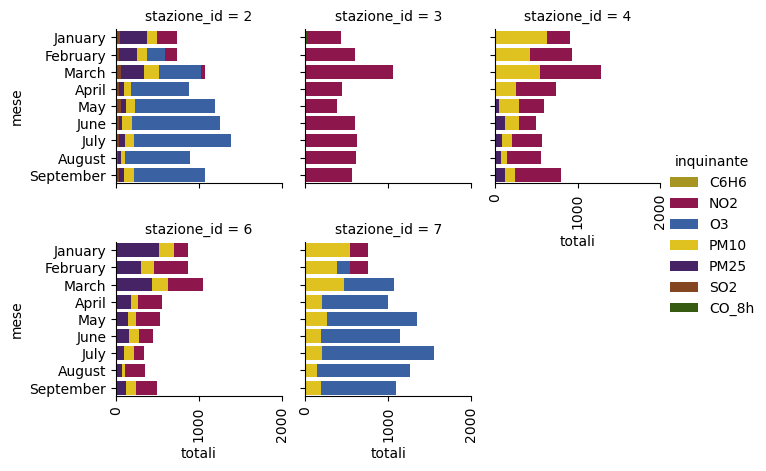

In [151]:
Ordine=["January", "February", "March", "April", "May", "June", "July", "August", "September"]

Colori=["#bda50b", "#a1034a", "#295eb3", "gold", "#471870", "#94420f", "#356604"]

g2 = sns.FacetGrid(df_grp2, col='stazione_id', hue='inquinante', palette=Colori, col_wrap=3, height=2.3)
g2.map(sns.barplot, 'totali', 'mese', order=Ordine).add_legend()
g2.set_xticklabels(rotation=90)